In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

In [29]:
data = pd.read_csv("TWITTER.csv")

In [30]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
1,2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300


In [31]:
data['Date'] = pd.to_datetime(data['Date'])

In [32]:
print(data.describe())

                                Date         Open         High          Low  \
count                           2172  2172.000000  2172.000000  2172.000000   
mean   2018-03-02 17:46:04.640883968    35.759811    36.435994    35.069503   
min              2013-11-07 00:00:00    13.950000    14.220000    13.730000   
25%              2016-01-05 18:00:00    24.822500    25.549999    24.129999   
50%              2018-03-03 12:00:00    34.900002    35.430000    34.295000   
75%              2020-04-29 06:00:00    44.209999    45.095000    43.230000   
max              2022-06-24 00:00:00    78.360001    80.750000    76.050003   
std                              NaN    14.305437    14.562577    14.003070   

             Close    Adj Close        Volume  
count  2172.000000  2172.000000  2.172000e+03  
mean     35.732063    35.732063  2.191115e+07  
min      14.010000    14.010000  3.661100e+06  
25%      24.862501    24.862501  1.258305e+07  
50%      34.754999    34.754999  1.713035e+07  


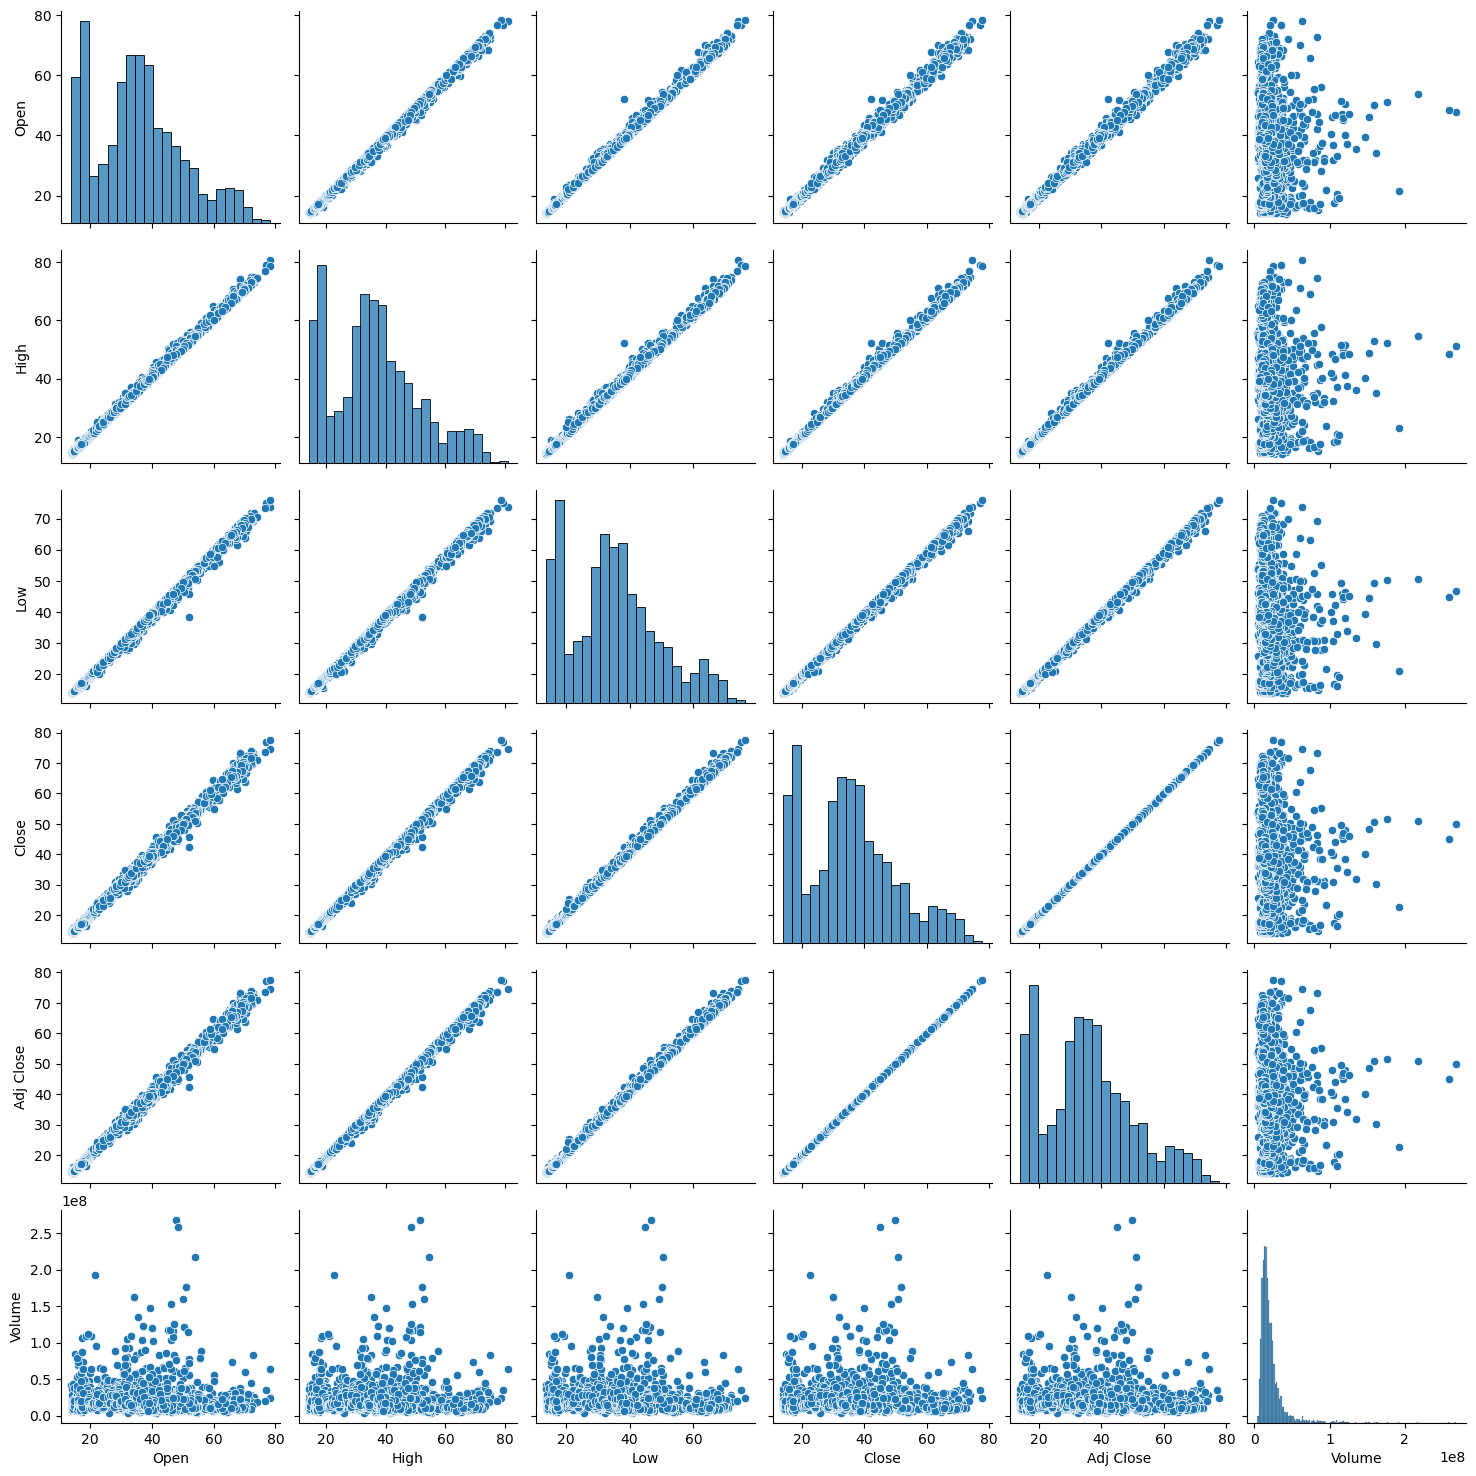

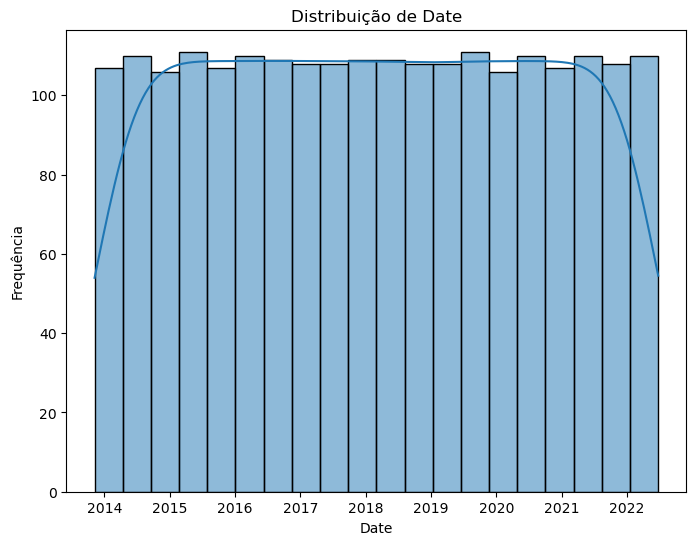

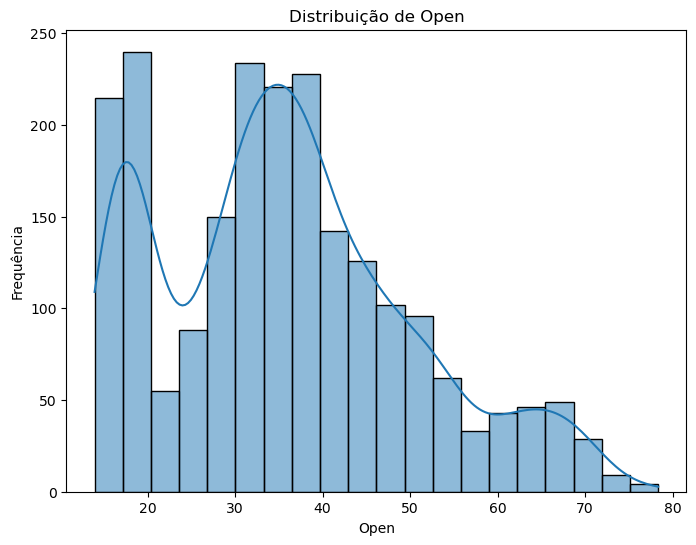

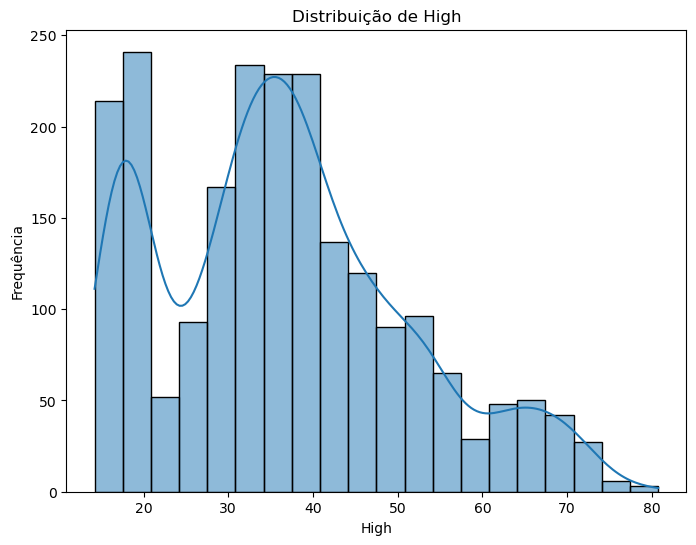

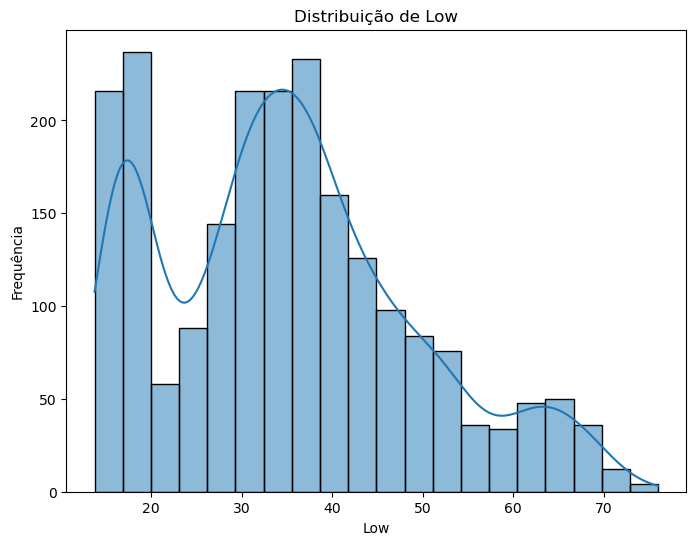

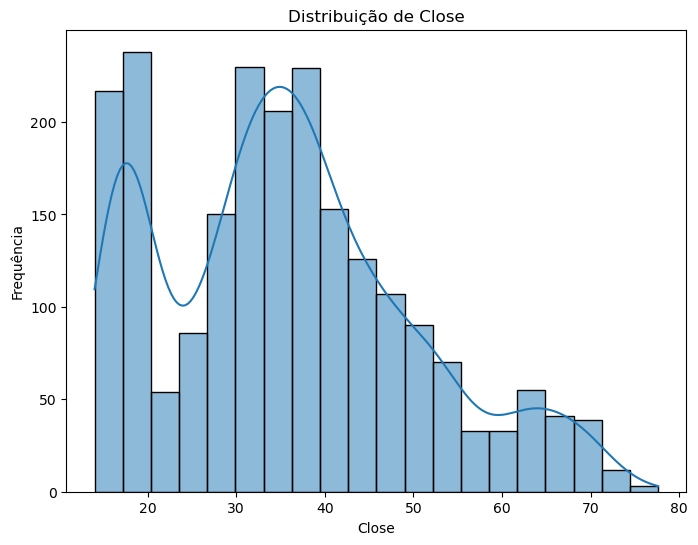

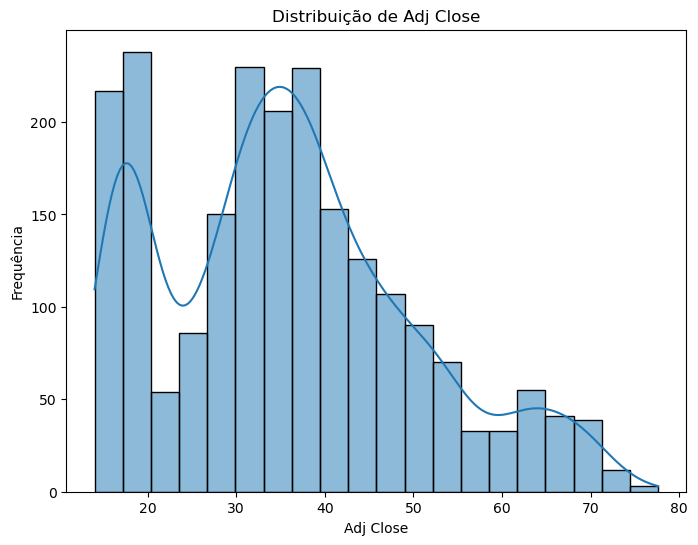

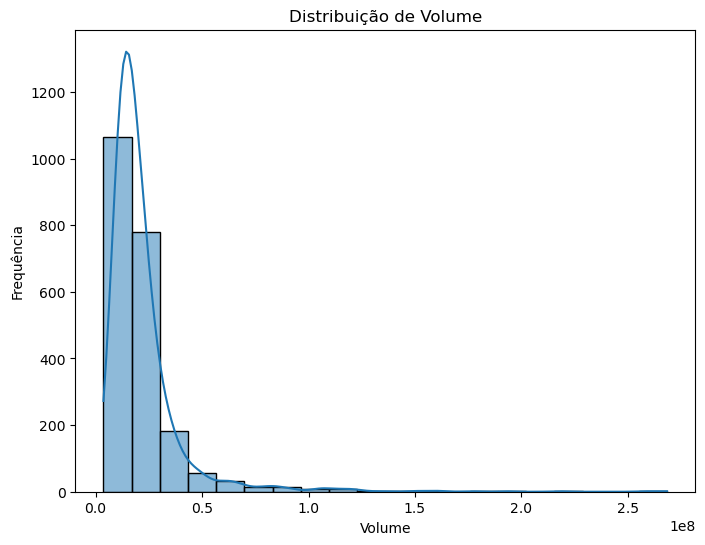

In [33]:
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
plt.show()

# Visualizar a distribuição das features individualmente
for column in data.columns:
    if data[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        sns.histplot(data[column], bins=20, kde=True)
        plt.title(f'Distribuição de {column}')
        plt.xlabel(column)
        plt.ylabel('Frequência')
        plt.show()

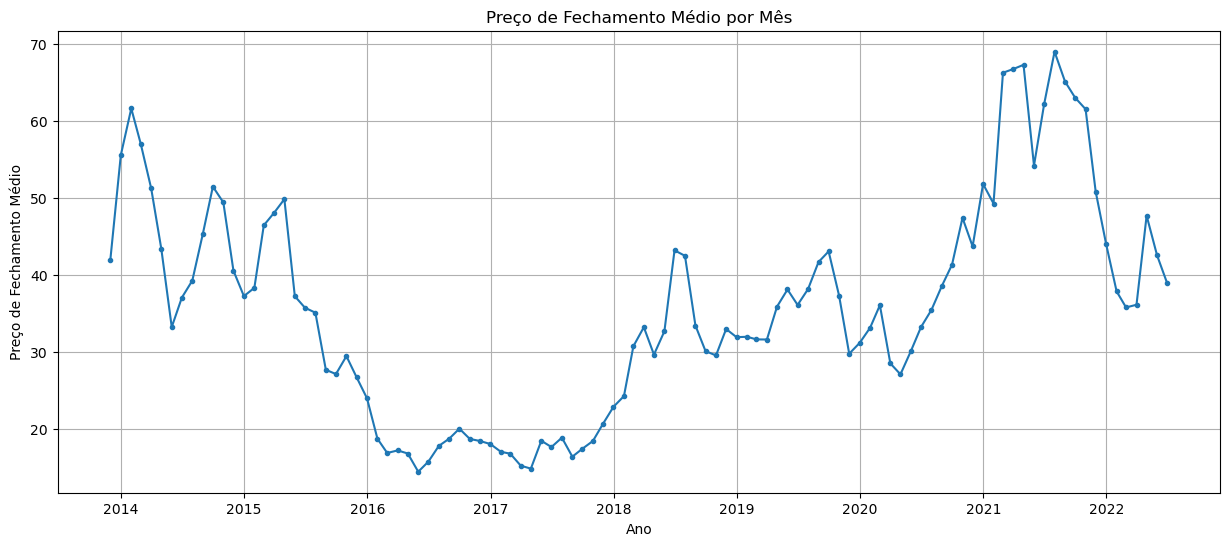

In [34]:
# Agrupar os dados por mês e calcular a média da feature 'Close'
df_monthly = data.resample('M', on='Date').mean()

# Plotar o gráfico histórico com a feature 'Close'
plt.figure(figsize=(15, 6))
plt.plot(df_monthly.index, df_monthly['Close'], marker='.', linestyle='-')
plt.title('Preço de Fechamento Médio por Mês')
plt.xlabel('Ano')
plt.ylabel('Preço de Fechamento Médio')
plt.xticks()
plt.grid(True)
plt.show()


In [35]:
# Normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

In [36]:
# Função para criar os dados de treinamento
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 3])  # 3 é o índice da coluna 'Close'
    return np.array(X), np.array(y)

In [37]:
# Definindo o timestep
time_step = 100
X, y = create_dataset(scaled_data, time_step)

# Dividindo os dados em conjuntos de treinamento e teste
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshaping dos dados para o formato esperado pela LSTM (número de amostras, timestep, características)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 6)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 6)

In [38]:
# Construindo o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [39]:
# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - loss: 0.0233
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - loss: 0.0034
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 0.0031
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 0.0027
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 0.0026
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 0.0023
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 0.0022
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 0.0019
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 0.0018
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 0.0019
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0018
Epoch 12/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 0.0016
Epoch 13/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 0.0016
Epoch 14/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 0.0018
Epoch 15/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s

In [42]:
# Avaliando o modelo
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

Train Loss: 0.00035605340963229537
Test Loss: 0.0015689810970798135


In [43]:
# Fazendo previsões
predictions = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step


In [44]:
# Fazendo previsões
predictions = model.predict(X_test)

# Desfazendo a normalização apenas na coluna 'Close'
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Ajustando as dimensões das previsões para corresponderem à forma original
predictions = predictions.reshape(-1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


ValueError: non-broadcastable output operand with shape (415,1) doesn't match the broadcast shape (415,6)

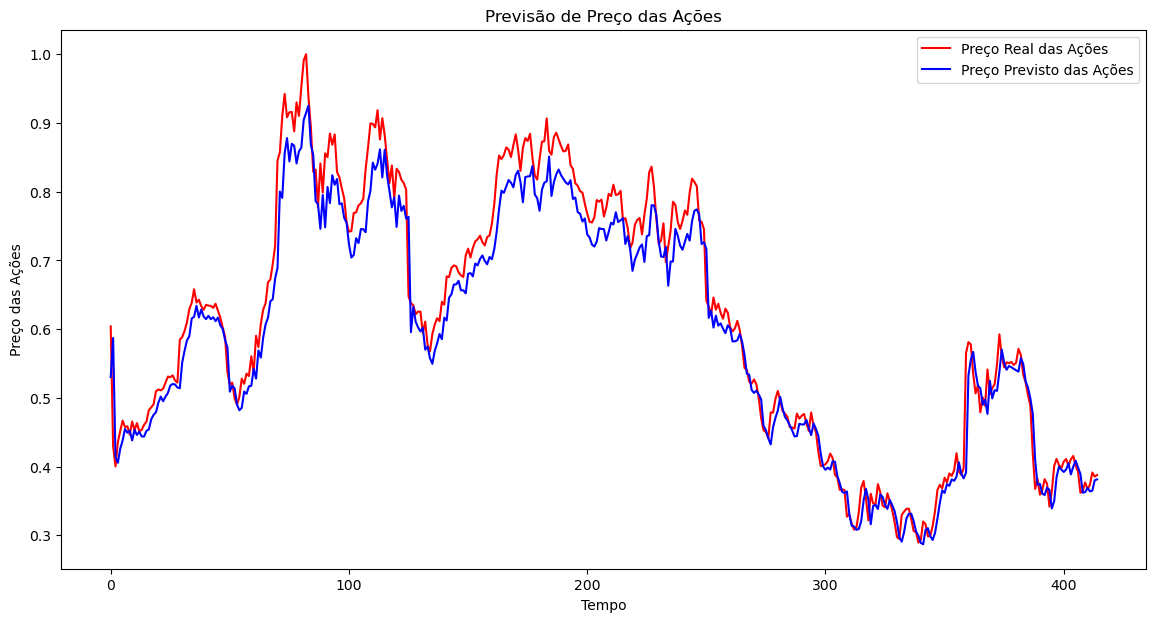

In [45]:
# Visualizando os resultados
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='red', label='Preço Real das Ações') 
plt.plot(predictions, color='blue', label='Preço Previsto das Ações')
plt.title('Previsão de Preço das Ações')
plt.xlabel('Tempo')
plt.ylabel('Preço das Ações')
plt.legend()
plt.show()

In [48]:
# Salvando o modelo
model.save('modelo_X.keras')